In [12]:
import re
import urllib.request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import random

In [77]:
Anki = pd.read_csv('data/Core Japanese Vocabulary Extended.txt', 
                   sep='\t', header=None, 
                   names=['jp', 'en', 'jp_kana', 'pos', 'more_en', 'sound', 'level'])[['jp', 'en', 
                                                    'jp_kana', 'pos', 'more_en', 'level']]

Anki.level = Anki.level.fillna('jlpt-n0').apply(lambda s: s[-7:]) # The last level marker is always the lowest
Anki.pos = Anki.pos.fillna('None') # These mostly seem like interjections

JLPT = Anki[Anki.level != 'jlpt-n0']

Anki.sample(20)

,jp,en,jp_kana,pos,more_en,level
53,散歩,"walk, stroll",散歩[さんぽ],"Noun, Suru verb",NaN,jlpt-n5
2347,頃,"(approximate) time, around, about, toward",頃[ころ],"Noun, Adverbial noun, Noun - used as a suffix","suitable time (or condition); time of year, se...",jlpt-n3
692,気分,"feeling, mood",気分[きぶん],Noun,NaN,jlpt-n4
18150,ゲバリスタ,Guevarista,ゲバリスタ,Noun,NaN,jlpt-n0
1598,動詞,verb,動詞[どうし],"Noun, No-adjective",NaN,jlpt-n3
15504,棋院,"go institution, go club, go hall",棋院[きいん],Noun,NaN,jlpt-n0
13730,スリム,slim,スリム,"Na-adjective, Noun",NaN,jlpt-n0
13517,ブラック,black,ブラック,Noun,NaN,jlpt-n0
12978,師範,"instructor, (fencing) teacher, model",師範[しはん],"Na-adjective, Noun",NaN,jlpt-n0
11619,オーロラ,aurora,オーロラ,Noun,NaN,jlpt-n0


<AxesSubplot:ylabel='level'>

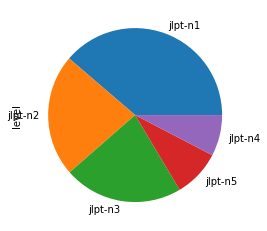

In [78]:
JLPT.level.value_counts()[:].plot.pie()

In [79]:
JLPT[JLPT.pos.fillna('').str.contains('Suru verb')].sample(20)

,jp,en,jp_kana,pos,more_en,level
2767,のんびり,"carefree, at leisure",のんびり,"Adverb, Adverb taking the 'to' particle, Suru ...",NaN,jlpt-n3
2730,がっかり,"feel disappointed, dejected, lose heart, feel ...",がっかり,"Adverb, Noun, Suru verb, Adverb taking the 'to...",NaN,jlpt-n3
4838,非難,"criticism, blame, censure, attack, reproach",非難[ひなん],"Noun, Suru verb, Na-adjective",NaN,jlpt-n1
7027,下番,going off duty,下番[かばん],"Noun, Suru verb",NaN,jlpt-n1
1542,渋滞,"congestion (e.g. traffic), delay, stagnation",渋滞[じゅうたい],"Noun, Suru verb",NaN,jlpt-n3
1407,衝突,"collision, crash, running into",衝突[しょうとつ],"Noun, Suru verb","conflict, quarrel, clashing",jlpt-n3
4045,カバー,"cover, covering, dust jacket",カバー,"Noun, Suru verb","cover song, cover version; coverage; to compen...",jlpt-n2
6794,保養,"health preservation, recuperation, recreation",保養[ほよう],"Noun, Suru verb",NaN,jlpt-n1
5134,排除,"exclusion, removal, rejection, elimination, ab...",排除[はいじょ],"Noun, Suru verb, No-adjective",NaN,jlpt-n1
1729,便り,"news, tidings, information, correspondence, le...",便[たよ]り,"Noun, Noun - used as a suffix, Suru verb",NaN,jlpt-n3


In [85]:
JLPT[JLPT.pos.fillna('').str.contains("Adverb taking the ")].sample(20)

,jp,en,jp_kana,pos,more_en,level
6517,おどおど,"timidly, nervously, hesitantly, trembling (wit...",おどおど,"Adverb, Adverb taking the 'to' particle, Suru ...",NaN,jlpt-n1
7231,着々,steadily,着々[ちゃくちゃく],"Adverb, Adverb taking the 'to' particle",NaN,jlpt-n2
464,段々,"gradually, by degrees, little by little, more ...",段々[だんだん],"Adverb, Adverb taking the 'to' particle","steps, stairs, staircase, terrace",jlpt-n5
2817,ばったり,"with a clash, with a thud, with a bang, with a...",ばったり,"Adverb, Adverb taking the 'to' particle",unexpectedly (meeting someone); suddenly (endi...,jlpt-n3
4153,うっかり,"carelessly, thoughtlessly, inadvertently",うっかり,"Adverb, Adverb taking the 'to' particle, Suru ...",NaN,jlpt-n2
6946,ちやほや,"to pamper, to make a fuss of, to spoil, to faw...",ちやほや,"Suru verb, Adverb, Adverb taking the 'to' part...",NaN,jlpt-n1
1178,はっきり,"clearly, plainly, distinctly",はっきり,"Adverb, Adverb taking the 'to' particle","to be clear, to be definite, to be certain, to...",jlpt-n4
5303,依然,"still, as yet, as it has been",依然[いぜん],"Taru-adjective, Adverb taking the 'to' particl...",NaN,jlpt-n1
6510,だぶだぶ,"loose (of clothing), baggy",だぶだぶ,"Na-adjective, No-adjective, Adverb, Adverb tak...","flabby, saggy; sloshing, slopping, overflowing...",jlpt-n1
2761,たっぷり,"full, in plenty, ample",たっぷり,"Adverb, Adverb taking the 'to' particle, Noun,...",NaN,jlpt-n3


In [89]:
# 51 terms
JLPT[JLPT.jp.str.contains('々')]

,jp,en,jp_kana,pos,more_en,level
249,時々,"sometimes, at times",時々[ときどき],"Adverb, Noun, No-adjective",NaN,jlpt-n5
442,色々,"various, all sorts of, variety of",色々[いろいろ],"Na-adjective, No-adjective, Adverb, Adverb tak...",various colors (colours),jlpt-n5
464,段々,"gradually, by degrees, little by little, more ...",段々[だんだん],"Adverb, Adverb taking the 'to' particle","steps, stairs, staircase, terrace",jlpt-n5
1582,屡々,"often, again and again, frequently, repeatedly",屡々[しばしば],Adverb,NaN,jlpt-n3
1621,我々,we,我々[われわれ],Pronoun,NaN,jlpt-n3
1824,様々,"varied, various",様々[さまざま],"Na-adjective, Noun",NaN,jlpt-n3
1940,次々,"in succession, one by one",次々[つぎつぎ],"Adverb, Adverb taking the 'to' particle, Noun",NaN,jlpt-n3
1964,徐々,"slow, gradual, steady",徐々[じょじょ],"Taru-adjective, Adverb taking the 'to' particle","calm, composed, relaxed",jlpt-n3
1969,少々,"just a minute, small quantity",少々[しょうしょう],"Adverbial noun, Noun",NaN,jlpt-n3
2094,度々,"often, again and again, over and over again, r...",度々[たびたび],Adverb,NaN,jlpt-n3
